In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



In [16]:
data = pd.read_csv('Mall_Customers.csv')

# Check the first few rows of the data to understand its structure
print(data.head())

# Check for any missing values and handle them if necessary
print(data.isnull().sum())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [31]:
features = data[['Spending Score (1-100)']]

# Standardize Data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [32]:
wcss = []
for k in range(1, 11):  # Try different values of k from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

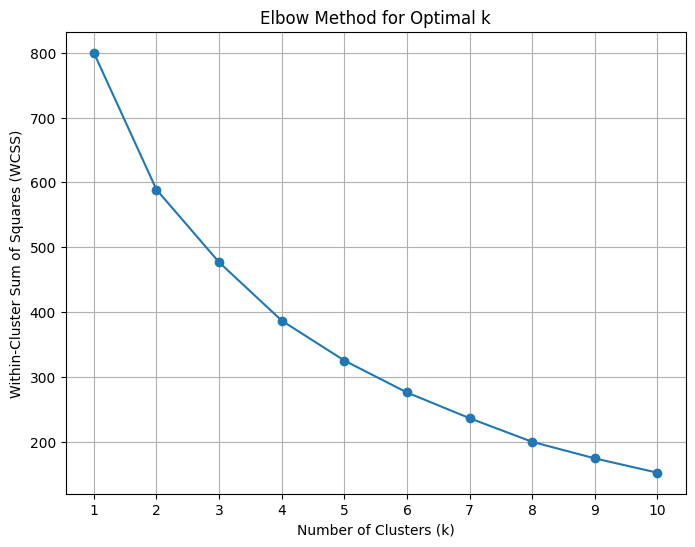

In [28]:
# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [36]:
X = data.iloc[:, [2, 3]].values
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=56)

# Fit K-means to the scaled data
kmeans.fit(features_scaled)
y_kmeans = kmeans.fit_predict(X)
# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to the original dataset
data['cluster'] = cluster_labels


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


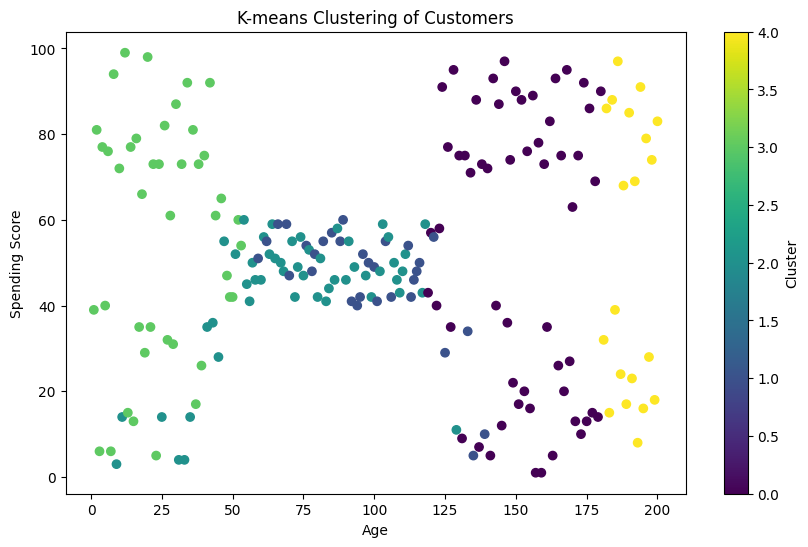

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(data['CustomerID'], data['Spending Score (1-100)'], c=data['cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('K-means Clustering of Customers')
plt.colorbar(label='Cluster')
plt.show()